# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model


## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 31s 71ms/step - loss: 0.3737 - accuracy: 0.8888 - val_loss: 0.0811 - val_accuracy: 0.9773
Epoch 2/15
422/422 [==============================] - 31s 73ms/step - loss: 0.1120 - accuracy: 0.9655 - val_loss: 0.0566 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0839 - accuracy: 0.9748 - val_loss: 0.0462 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 29s 69ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.0435 - val_accuracy: 0.9873
Epoch 5/15
422/422 [==============================] - 28s 65ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0394 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 28s 67ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 28s 66ms/step - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.0348 - val_accuracy:

## Evaluate the trained model

(10000, 28, 28, 1)
(1, 28, 28, 1)


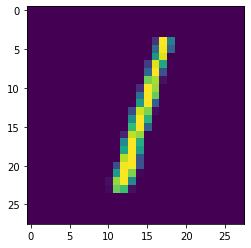

[3.98483564e-07 9.99325037e-01 1.03574139e-05 6.44578222e-08
 5.16285829e-04 1.20904599e-06 2.03833006e-05 1.07307766e-04
 1.75472887e-05 1.48767674e-06]


In [4]:
print(x_test.shape)
onImage = x_test[2:3]
print(onImage.shape)
target = model.predict(onImage)

showimg = onImage.reshape(28,28)

imgplot = plt.imshow(showimg)
plt.show()

print(target[0])

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024767795577645302
Test accuracy: 0.9909999966621399


#save_Model_and_reload

In [8]:
model.save('mnistModelLearned.h5')

In [3]:
model = load_model('mnistModelLearned.h5')